# Dowload dataset

In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=cc77f72e238dc6fcc44525a8f6f422ef83ca7b28bf078f2266246f730868a0f7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
wget.download(link)

'traffic-signs-data.zip'



1.   Giải nén file zip



In [ ]:
import os
import pickle

In [ ]:
!unzip traffic-signs-data.zip

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


In [ ]:
dataset = "/content/traffic_signs_data"



2.   Load dataset từ folder dataset



In [ ]:
TRAIN_FILE = "train.p"
VALID_FILE = "valid.p"
TEST_FILE = "test.p"

def get_data(folder):
    training_file = os.path.join(folder, TRAIN_FILE)
    validation_file= os.path.join(folder, VALID_FILE)
    testing_file =  os.path.join(folder, TEST_FILE)

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']

    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = get_data(dataset)

In [ ]:
# print(X_train)
print(y_train)

[41 41 41 ... 25 25 25]


In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

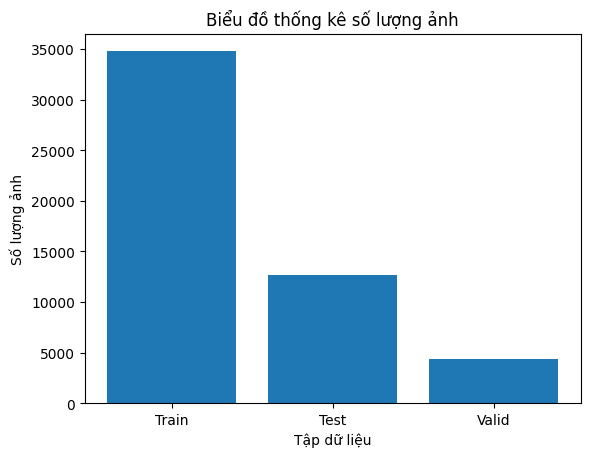

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(['Train', 'Test', 'Valid'], [len(X_train), len(X_test), len(X_valid)])
plt.xlabel('Tập dữ liệu')
plt.ylabel('Số lượng ảnh')
plt.title('Biểu đồ thống kê số lượng ảnh')
plt.show()



3. Ảnh thứ 0 của tập train và test trước khi chuẩn hóa



Text(0.5, 1.0, 'Ảnh test thứ 0')

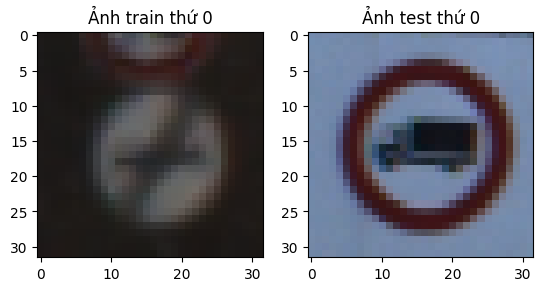

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('Ảnh train thứ 0')

plt.subplot(1, 2, 2)
plt.imshow(X_test[0])
plt.title('Ảnh test thứ 0')



4.   Convert to gray



In [ ]:
import numpy as np
X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

print(X_train_rgb.shape)
print(X_train_gray.shape)

print(X_test_rgb.shape)
print(X_test_gray.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 1)
(12630, 32, 32, 3)
(12630, 32, 32, 1)


In [ ]:
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray



5.   Ảnh sau khi convert sang gray



Text(0.5, 1.0, 'Ảnh test thứ 0')

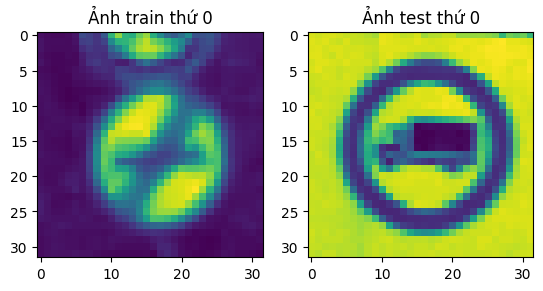

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('Ảnh train thứ 0')

plt.subplot(1, 2, 2)
plt.imshow(X_test[0])
plt.title('Ảnh test thứ 0')

6. Biểu đồ phân bố nhãn dữ liệu train và test

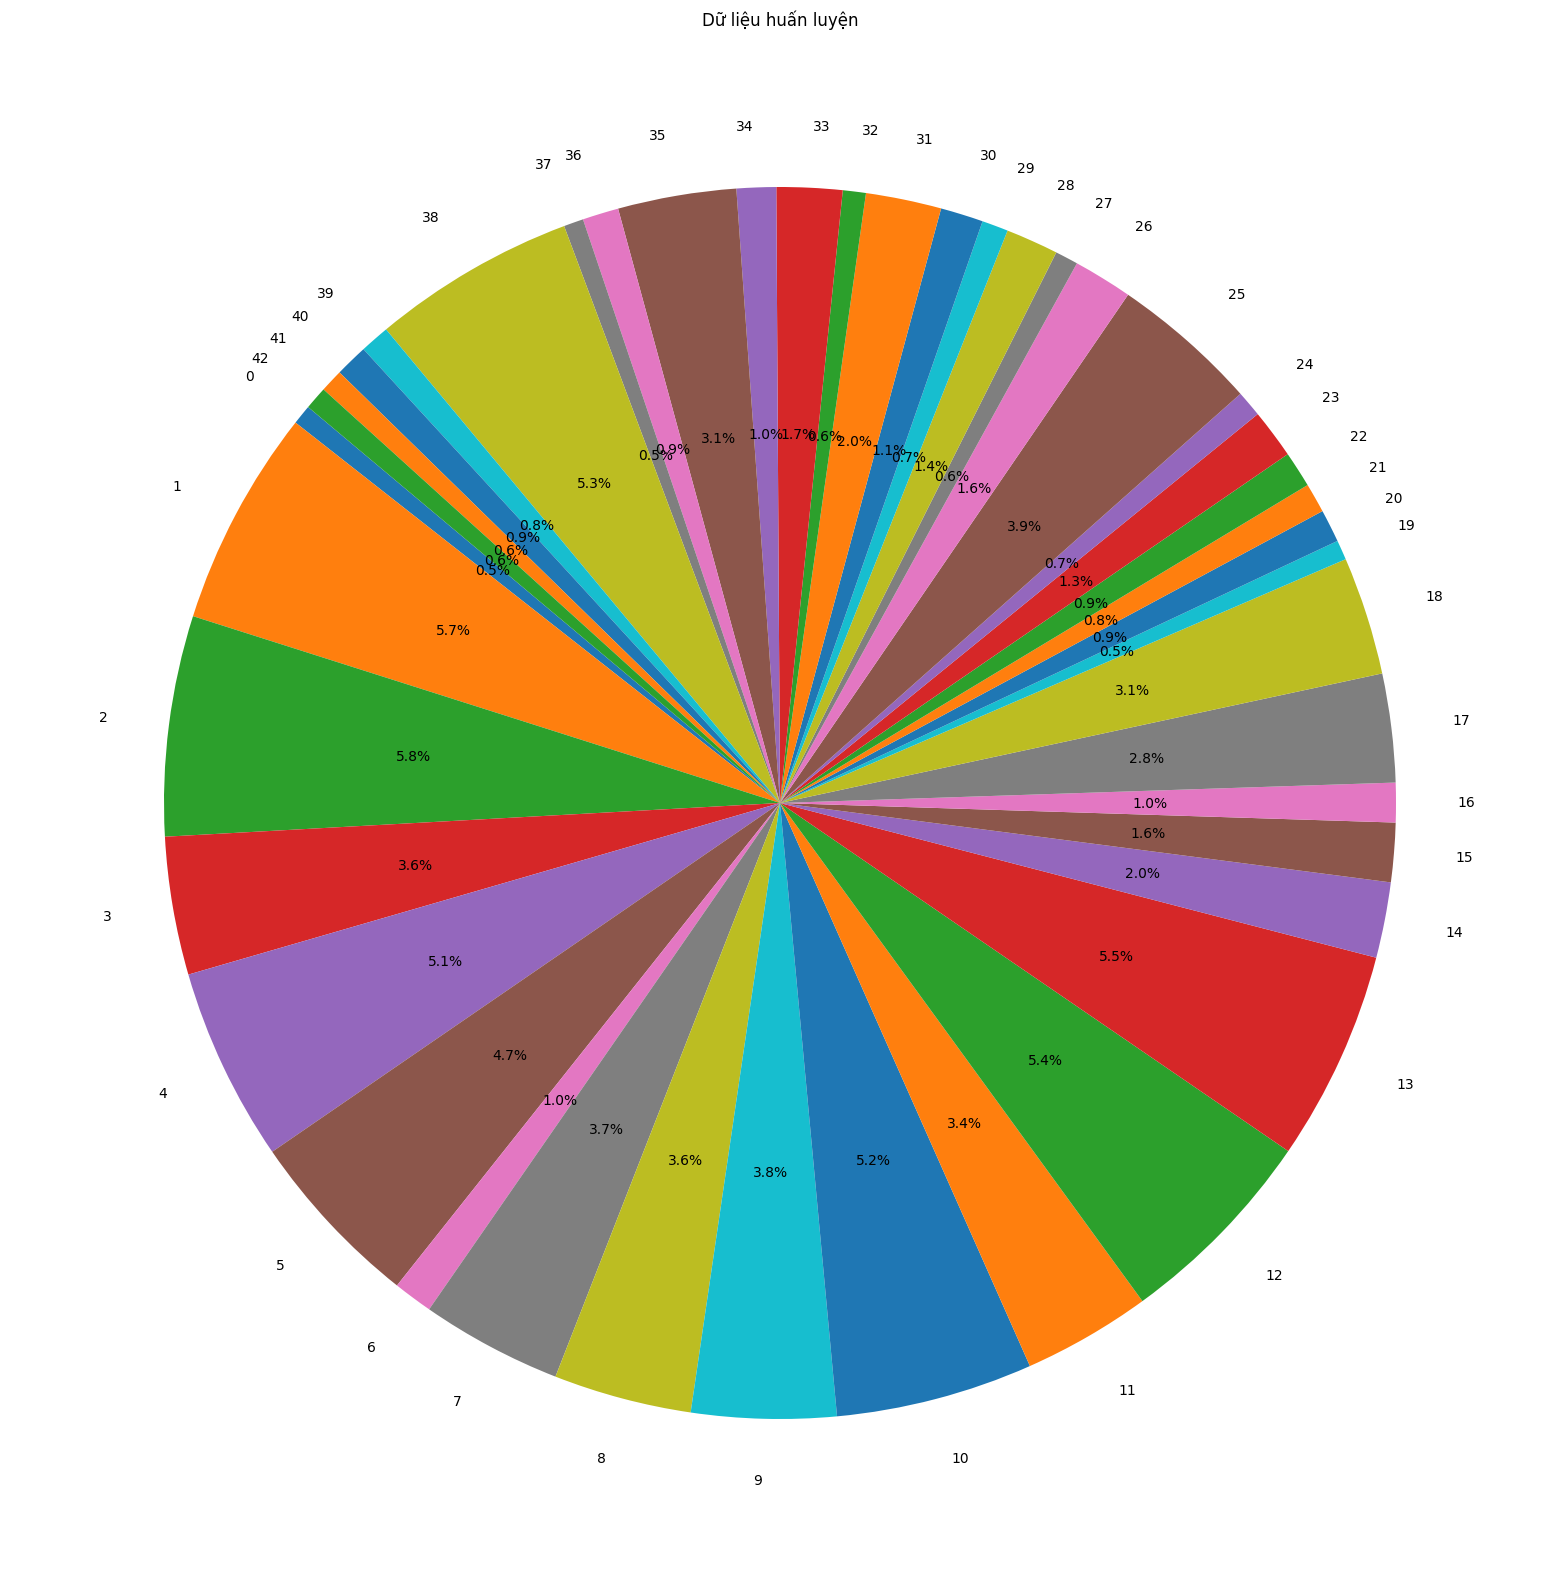

In [ ]:
import numpy as np
y_train = y_train.flatten()

unique_labels, label_counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(20, 20))

plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%', startangle=140)

plt.title('Dữ liệu huấn luyện')

plt.show()

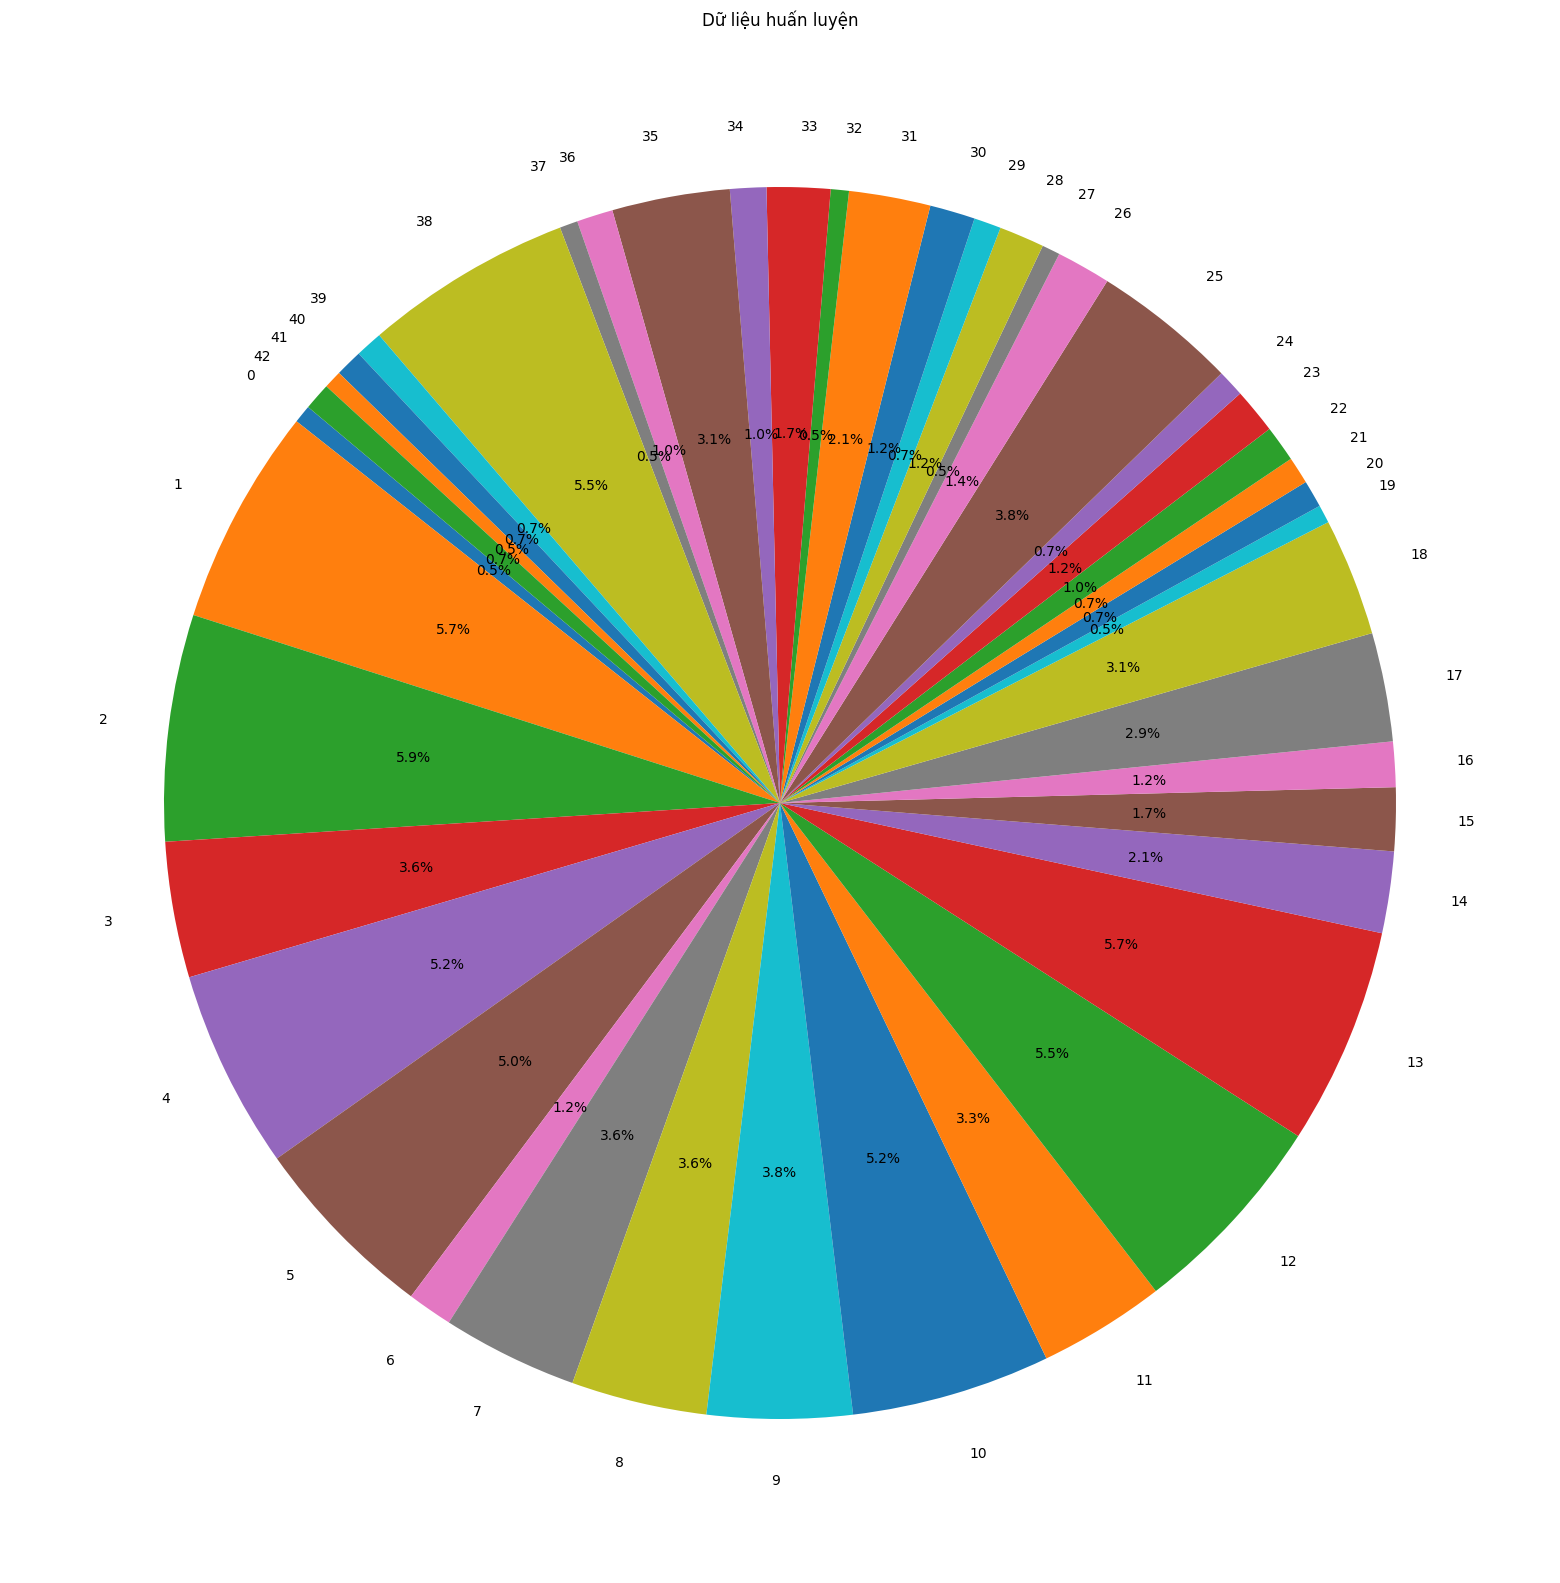

In [ ]:
y_test = y_test.flatten()

unique_labels, label_counts = np.unique(y_test, return_counts=True)

plt.figure(figsize=(20, 20))

plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%', startangle=140)

plt.title('Dữ liệu huấn luyện')

plt.show()

7. Chuẩn hóa dữ liệu

In [ ]:
X_train_normalized = X_train/127.5-1
X_test_normalized = X_test/127.5-1

7. Thay đổi số chiều của dữ liệu

In [ ]:
IMG_SIZE = 32
X_train_reshape = X_train_normalized.reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE*1)
X_test_reshape = X_test_normalized.reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE*1)

8. Huấn luyện mô hình với tham số mặc định

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
svm_model = SVC()
svm_model.fit(X_train_reshape, y_train)

SVC()

In [ ]:
svm_pred = svm_model.predict(X_test_reshape)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average = 'weighted')
svm_recall = recall_score(y_test, svm_pred, average = 'weighted')
svm_f1 = f1_score(y_test, svm_pred, average = 'weighted')

print(f'Accuracy: {svm_accuracy}')
print(f'Precision: {svm_precision}')
print(f'Recall: {svm_recall}')
print(f'f1 score: {svm_f1}')

Accuracy: 0.6611243072050673
Precision: 0.6829095678559605
Recall: 0.6611243072050673
f1 score: 0.6519016391599395


9. Ma trận nhẫm lẫn

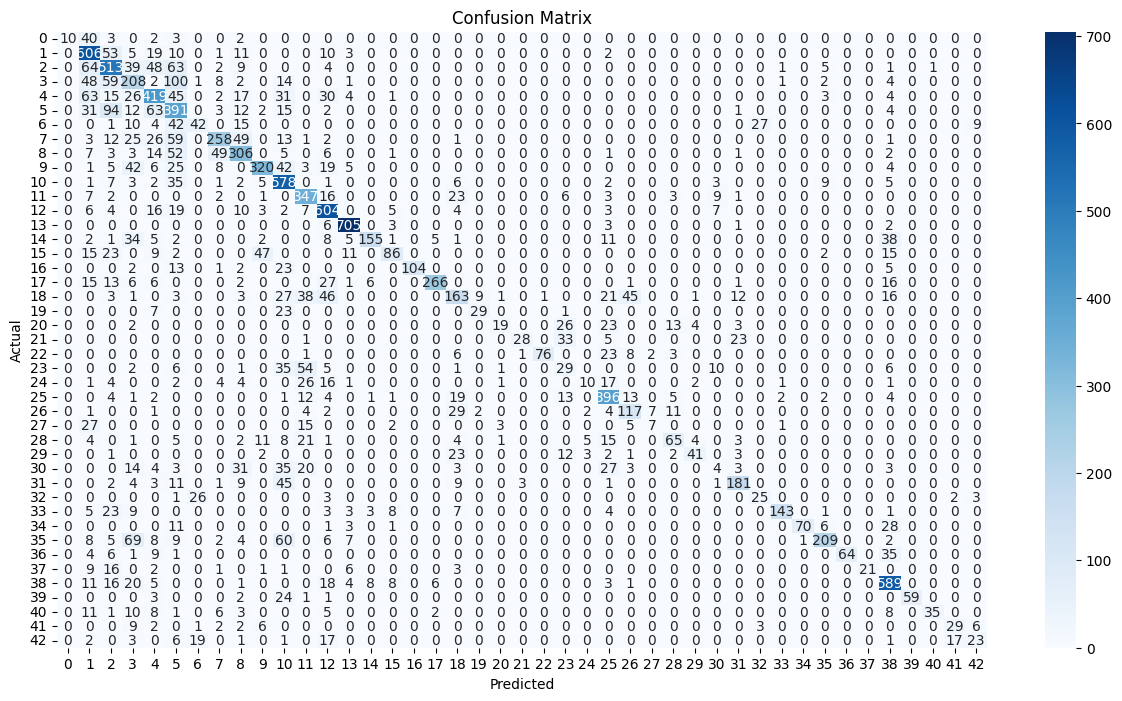

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(15, 8))

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

10. Tinh chỉnh mô hình sử dụng kernel poly, thay đổi giá trị tham số C và thay đổi giá trị degree

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C_values = [0.1, 1.0, 10.0]
degree_values = [2, 3, 4, 5]

for degree in degree_values:
    for C in C_values:
        svm_model = SVC(kernel='poly', degree=degree, C=C, random_state=42)
        svm_model.fit(X_train_reshape, y_train)

        svm_pred = svm_model.predict(X_test_reshape)

        svm_accuracy = accuracy_score(y_test, svm_pred)
        svm_precision = precision_score(y_test, svm_pred, average = 'weighted')
        svm_recall = recall_score(y_test, svm_pred, average = 'weighted')
        svm_f1 = f1_score(y_test, svm_pred, average = 'weighted')

        print(f'C: {C}, Accuracy: {svm_accuracy}')
        print(f'C: {C}, Precision: {svm_precision}')
        print(f'C: {C}, Recall: {svm_recall}')
        print(f'C: {C}, f1 score: {svm_f1}')

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 0.1, Accuracy: 0.4920823436262866
C: 0.1, Precision: 0.6430911311795533
C: 0.1, Recall: 0.4920823436262866
C: 0.1, f1 score: 0.5093372186666125
C: 1.0, Accuracy: 0.6145684877276326
C: 1.0, Precision: 0.7040145913741636
C: 1.0, Recall: 0.6145684877276326
C: 1.0, f1 score: 0.6274435194639595
C: 10.0, Accuracy: 0.6808392715756136
C: 10.0, Precision: 0.7253223322553514
C: 10.0, Recall: 0.6808392715756136
C: 10.0, f1 score: 0.6867987606155318


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 0.1, Accuracy: 0.460332541567696
C: 0.1, Precision: 0.6391018508379032
C: 0.1, Recall: 0.460332541567696
C: 0.1, f1 score: 0.4918109295178476
C: 1.0, Accuracy: 0.5477434679334917
C: 1.0, Precision: 0.6885114230466954
C: 1.0, Recall: 0.5477434679334917
C: 1.0, f1 score: 0.5756075743939805
C: 10.0, Accuracy: 0.5826603325415677
C: 10.0, Precision: 0.6794267411145976
C: 10.0, Recall: 0.5826603325415677
C: 10.0, f1 score: 0.6004280536853118


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 0.1, Accuracy: 0.42636579572446553
C: 0.1, Precision: 0.6260674078210197
C: 0.1, Recall: 0.42636579572446553
C: 0.1, f1 score: 0.4640925665651726
C: 1.0, Accuracy: 0.4981789390340459
C: 1.0, Precision: 0.6738459290343057
C: 1.0, Recall: 0.4981789390340459
C: 1.0, f1 score: 0.5344225002449796
C: 10.0, Accuracy: 0.5250197941409342
C: 10.0, Precision: 0.6654618182584309
C: 10.0, Recall: 0.5250197941409342
C: 10.0, f1 score: 0.5543146454352742


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 0.1, Accuracy: 0.3953285827395091
C: 0.1, Precision: 0.612582665781669
C: 0.1, Recall: 0.3953285827395091
C: 0.1, f1 score: 0.4372514000176762
C: 1.0, Accuracy: 0.4493269992082344
C: 1.0, Precision: 0.6405979631926272
C: 1.0, Recall: 0.4493269992082344
C: 1.0, f1 score: 0.486861733978407
C: 10.0, Accuracy: 0.48400633412509897
C: 10.0, Precision: 0.6532840569557109
C: 10.0, Recall: 0.48400633412509897
C: 10.0, f1 score: 0.518982631675844


11. Tinh chỉnh mô hình sử dụng kernel rbf và thay đổi giá trị tham số C

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C_values = [0.1, 1.0, 10.0]

for C in C_values:
    svm_model = SVC(kernel='rbf', C=C, gamma='scale', random_state=42)
    svm_model.fit(X_train_reshape, y_train)

    svm_pred = svm_model.predict(X_test_reshape)

    svm_accuracy = accuracy_score(y_test, svm_pred)
    svm_precision = precision_score(y_test, svm_pred, average = 'weighted')
    svm_recall = recall_score(y_test, svm_pred, average = 'weighted')
    svm_f1 = f1_score(y_test, svm_pred, average = 'weighted')

    print(f'C: {C}, Accuracy: {svm_accuracy}')
    print(f'C: {C}, Precision: {svm_precision}')
    print(f'C: {C}, Recall: {svm_recall}')
    print(f'C: {C}, f1 score: {svm_f1}')

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 0.1, Accuracy: 0.4467141726049089
C: 0.1, Precision: 0.5138749711768598
C: 0.1, Recall: 0.4467141726049089
C: 0.1, f1 score: 0.42102770634538594
C: 1.0, Accuracy: 0.6841646872525733
C: 1.0, Precision: 0.6996515231425525
C: 1.0, Recall: 0.6841646872525733
C: 1.0, f1 score: 0.6752841758569029
C: 10.0, Accuracy: 0.7454473475851148
C: 10.0, Precision: 0.7516675155918373
C: 10.0, Recall: 0.7454473475851148
C: 10.0, f1 score: 0.738847535988803


12. Tinh chỉnh mô hình sử dụng kernel linear và thay đổi giá trị tham số C

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C_values = [0.1, 1.0, 10.0]

for C in C_values:
    svm_model = SVC(kernel='linear', C=C, random_state=42)
    svm_model.fit(X_train_reshape, y_train)

    svm_pred = svm_model.predict(X_test_reshape)

    svm_accuracy = accuracy_score(y_test, svm_pred)
    svm_precision = precision_score(y_test, svm_pred, average = 'weighted')
    svm_recall = recall_score(y_test, svm_pred, average = 'weighted')
    svm_f1 = f1_score(y_test, svm_pred, average = 'weighted')

    print(f'C: {C}, Accuracy: {svm_accuracy}')
    print(f'C: {C}, Precision: {svm_precision}')
    print(f'C: {C}, Recall: {svm_recall}')
    print(f'C: {C}, f1 score: {svm_f1}')

C: 0.1, Accuracy: 0.807680126682502
C: 0.1, Precision: 0.8181703256862703
C: 0.1, Recall: 0.807680126682502
C: 0.1, f1 score: 0.8066641111035363
C: 1.0, Accuracy: 0.8060174188440221
C: 1.0, Precision: 0.8193508018555286
C: 1.0, Recall: 0.8060174188440221
C: 1.0, f1 score: 0.8067580371719795
C: 10.0, Accuracy: 0.8003958828186857
C: 10.0, Precision: 0.8141204036264553
C: 10.0, Recall: 0.8003958828186857
C: 10.0, f1 score: 0.8012445326810221


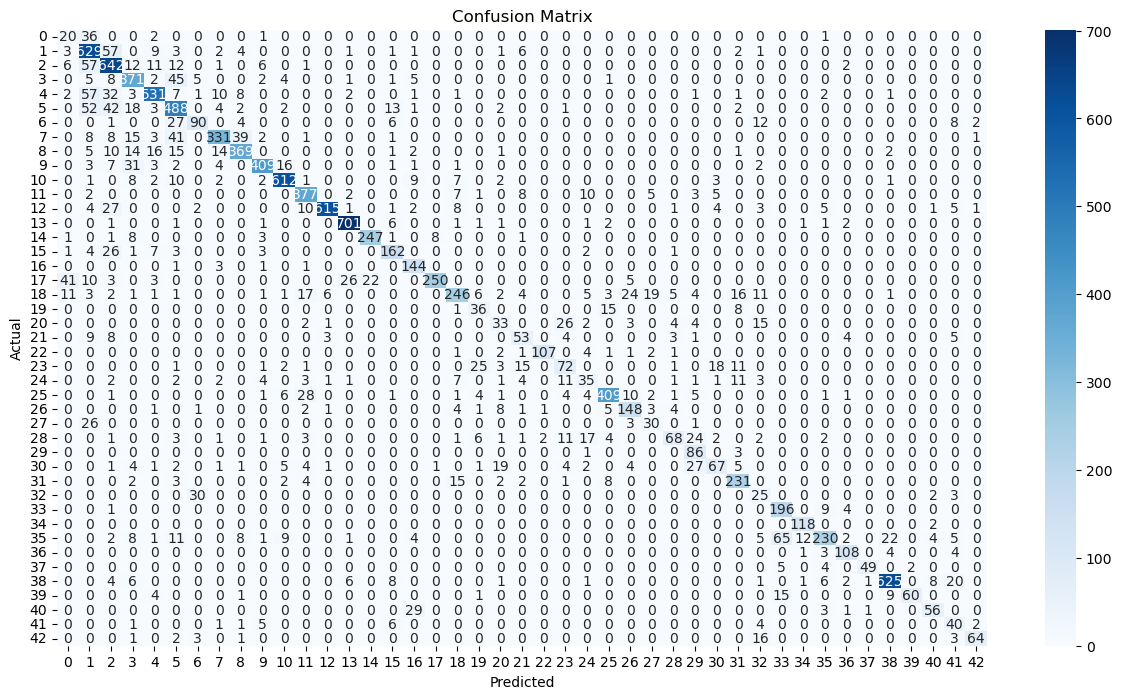

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(15, 8))

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()